In [1]:
import pandas
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
%matplotlib inline

In [3]:
spwdDF = pandas.read_csv("../data/spwidth-vel-all.csv", delim_whitespace=True,\
                             header=None)
spwdDF.columns = [ "MLAT", "normMLT", "MLON", "spwdth", "vLos", "azim" ]
spwdDF = spwdDF[ spwdDF["MLAT"] > 50. ].reset_index(drop=True)
spwdDF.head()

,MLAT,normMLT,MLON,spwdth,vLos,azim
0,59.7741,-4.2208,-24.0177,20.2350,-409.0126,-55.5400
1,59.9954,-4.2667,-24.7065,11.7906,-415.8360,-56.1702
2,60.2129,-4.3132,-25.4040,11.8970,-426.6562,-56.8076
3,60.4265,-4.3603,-26.1101,34.6258,-427.8934,-57.4524
4,60.6361,-4.4080,-26.8249,43.0235,-424.4578,-58.1047


In [4]:
spwdDF = spwdDF.apply( numpy.round )
spwdDF.head()

,MLAT,normMLT,MLON,spwdth,vLos,azim
0,60,-4,-24,20,-409,-56
1,60,-4,-25,12,-416,-56
2,60,-4,-25,12,-427,-57
3,60,-4,-26,35,-428,-57
4,61,-4,-27,43,-424,-58


In [29]:
spwMean = spwdDF.groupby( [ "MLAT", "normMLT" ] ).mean().reset_index()
spwMean.head()

,MLAT,normMLT,MLON,spwdth,vLos,azim
0,50,-12,-113,2,-50,-2
1,50,-11,-113,2,-89,-2
2,50,-10,-158,4,-690,-102
3,50,-9,-113,2,-1291,-104
4,50,-8,-176,0,-168,-112


(-1000, 500)

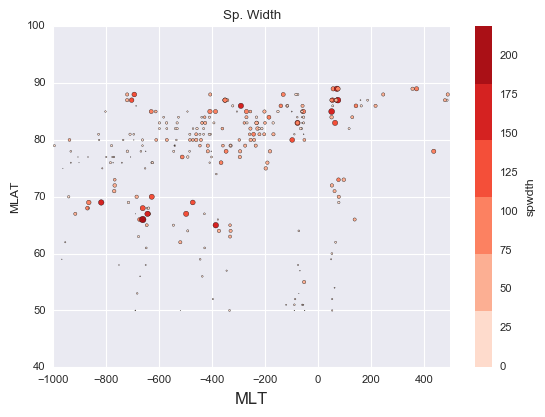

In [30]:
# Seaborn styling
sns.set_style("darkgrid")
sns.set_context("paper")
seaMap = ListedColormap(sns.color_palette("Reds"))
# Plot using matplotlib
fig1 = plt.figure()
ax = fig1.add_subplot(111)
spwMean.plot( kind='scatter',
              x='vLos',
              y='MLAT',
              c='spwdth',
              s=spwMean["spwdth"]/10, cmap=seaMap, ax=ax)
ax.set_ylabel("MLAT")
ax.set_xlabel("MLT", fontsize=12)
ax.set_title( "Sp. Width" )
ax.set_xlim( [-1000, 500] )
# ax.set_ylim( [50, 80] )
# plt.savefig("../figs/meanVelMLATMLT.pdf",bbox_inches='tight')

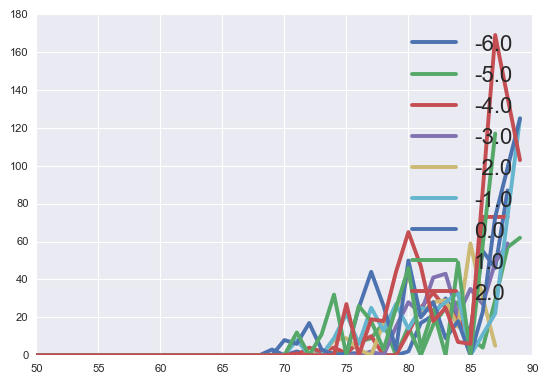

In [31]:
# setup fig
fig = plt.figure()
ax1 = fig.add_subplot(111)
# seaborn styling
sns.set_style("whitegrid")
sns.set_context("poster")


for cmlt in spwMean["normMLT"].unique().tolist():
    if (cmlt > -7) and (cmlt < 3):
        selDF = spwMean[ spwMean["normMLT"] == cmlt ]
        ax1.plot( selDF['MLAT'],
                    selDF['spwdth'], label=str(cmlt) )
plt.legend()
# ax1.scatter(selDF['normMLT'],
#             selDF['spwdth'],
#             marker='o',
#             color='firebrick',
#             alpha=0.7,
#             s = 124)